<a href="https://colab.research.google.com/github/adenugroho/Mchn-Learning/blob/main/UTS1_G241220002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # aljabar linier
import pandas as pd # pemrosesan data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ecomm = pd.read_csv("/content/drive/MyDrive/Kuliah 23/Semester 3/Machine Learning/CADdataset.csv" )

ecomm.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 303 non-null    int64  
 1   Weight              303 non-null    int64  
 2   Height              303 non-null    int64  
 3   Sex                 303 non-null    object 
 4   BMI                 303 non-null    float64
 5   DM                  303 non-null    int64  
 6   HTN                 303 non-null    int64  
 7   Current Smoker      303 non-null    int64  
 8   Obesity             303 non-null    object 
 9   DLP                 303 non-null    object 
 10  BP                  303 non-null    int64  
 11  WPE                 303 non-null    object 
 12  Typical Chest Pain  303 non-null    int64  
 13  Atypical            303 non-null    object 
 14  Nonanginal          303 non-null    object 
 15  St Depression       303 non-null    int64  
 16  Tinversi

In [3]:
new_cols=[]
for i in ecomm.columns[1:-1]:
    i = i.replace("_"," ")
    i = i.title()
    new_cols.append(i);
new_cols = ['ID'] +  new_cols
new_cols.append('Arrival')
ecomm.columns = new_cols
ecomm.columns.to_list()

ecomm.iloc[:,1:-1].describe()


,Weight,Height,Bmi,Dm,Htn,Current Smoker,Bp,Typical Chest Pain,St Depression,Tinversion,Fbs,Esr,Ef,Rwma,Ex-Smoker,Cr,Bun
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,129.554455,0.541254,0.234323,0.297030,119.184818,19.462046,47.231023,0.620462,0.033003,1.055611,17.501650
std,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,18.938105,0.499120,0.424276,0.457706,52.079653,15.936475,8.927194,1.132531,0.178941,0.264296,6.956761
min,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,62.000000,1.000000,15.000000,0.000000,0.000000,0.500000,6.000000
25%,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,88.500000,9.000000,45.000000,0.000000,0.000000,0.900000,13.000000
50%,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,130.000000,1.000000,0.000000,0.000000,98.000000,15.000000,50.000000,0.000000,0.000000,1.000000,16.000000
75%,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,140.000000,1.000000,0.000000,1.000000,130.000000,26.000000,55.000000,1.000000,0.000000,1.200000,20.000000
max,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,190.000000,1.000000,1.000000,1.000000,400.000000,90.000000,60.000000,4.000000,1.000000,2.200000,52.000000


In [4]:
ecomm.describe(include='object')


,Sex,Obesity,Dlp,Wpe,Atypical,Nonanginal,Lvh,Prp,Arrival
count,303,303,303,303,303,303,303,303,303
unique,2,2,2,2,2,2,2,2,2
top,Male,Y,N,N,N,N,N,N,Cad
freq,176,211,191,298,210,287,283,294,216


In [5]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# create dummy variables for categorical variables
ecomm['Gender'] = ecomm.Sex.map({'Fmale':0, 'Male':1})
ecomm['Obesity'] = ecomm['Obesity'].map({'Y':0, 'N':1})
dummy = pd.DataFrame(pd.get_dummies(ecomm[['Atypical', 'Nonanginal']]))

# for normalizing data
from sklearn.preprocessing import scale
ecomm1 = pd.DataFrame(scale(ecomm[['Height','Weight']]),
         columns=['Height','Weight'])

# create new datafame for modeling
ecomm_final = pd.concat([ecomm1, dummy,ecomm[['Height','Weight','Gender', 'Obesity']]],
                        axis=1)

# Split data into output and input
X = ecomm_final.iloc[:,:-1] # inputs
Y = ecomm_final['Obesity'] # outputs

# Split data into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,shuffle=True)

# append different classification models into classifiers array
classifiers=[]
KNN_model = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifiers.append(KNN_model)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_train = []
accuracy_test = []
for clf in classifiers:
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    acc_train = accuracy_score(Y_train, pred_train)
    acc_test = accuracy_score(Y_test, pred_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)
accuracy_result = pd.DataFrame(data={'Model':['KNN'],
                                     'Training Accuracy':accuracy_train,
                                     'Testing Accuracy':accuracy_test})
accuracy_result.sort_values('Testing Accuracy',ascending=False)

,Model,Training Accuracy,Testing Accuracy
0,KNN,0.951542,0.947368


[Text(0, 0, '211 (69.64%)'), Text(0, 0, '92 (30.36%)')]

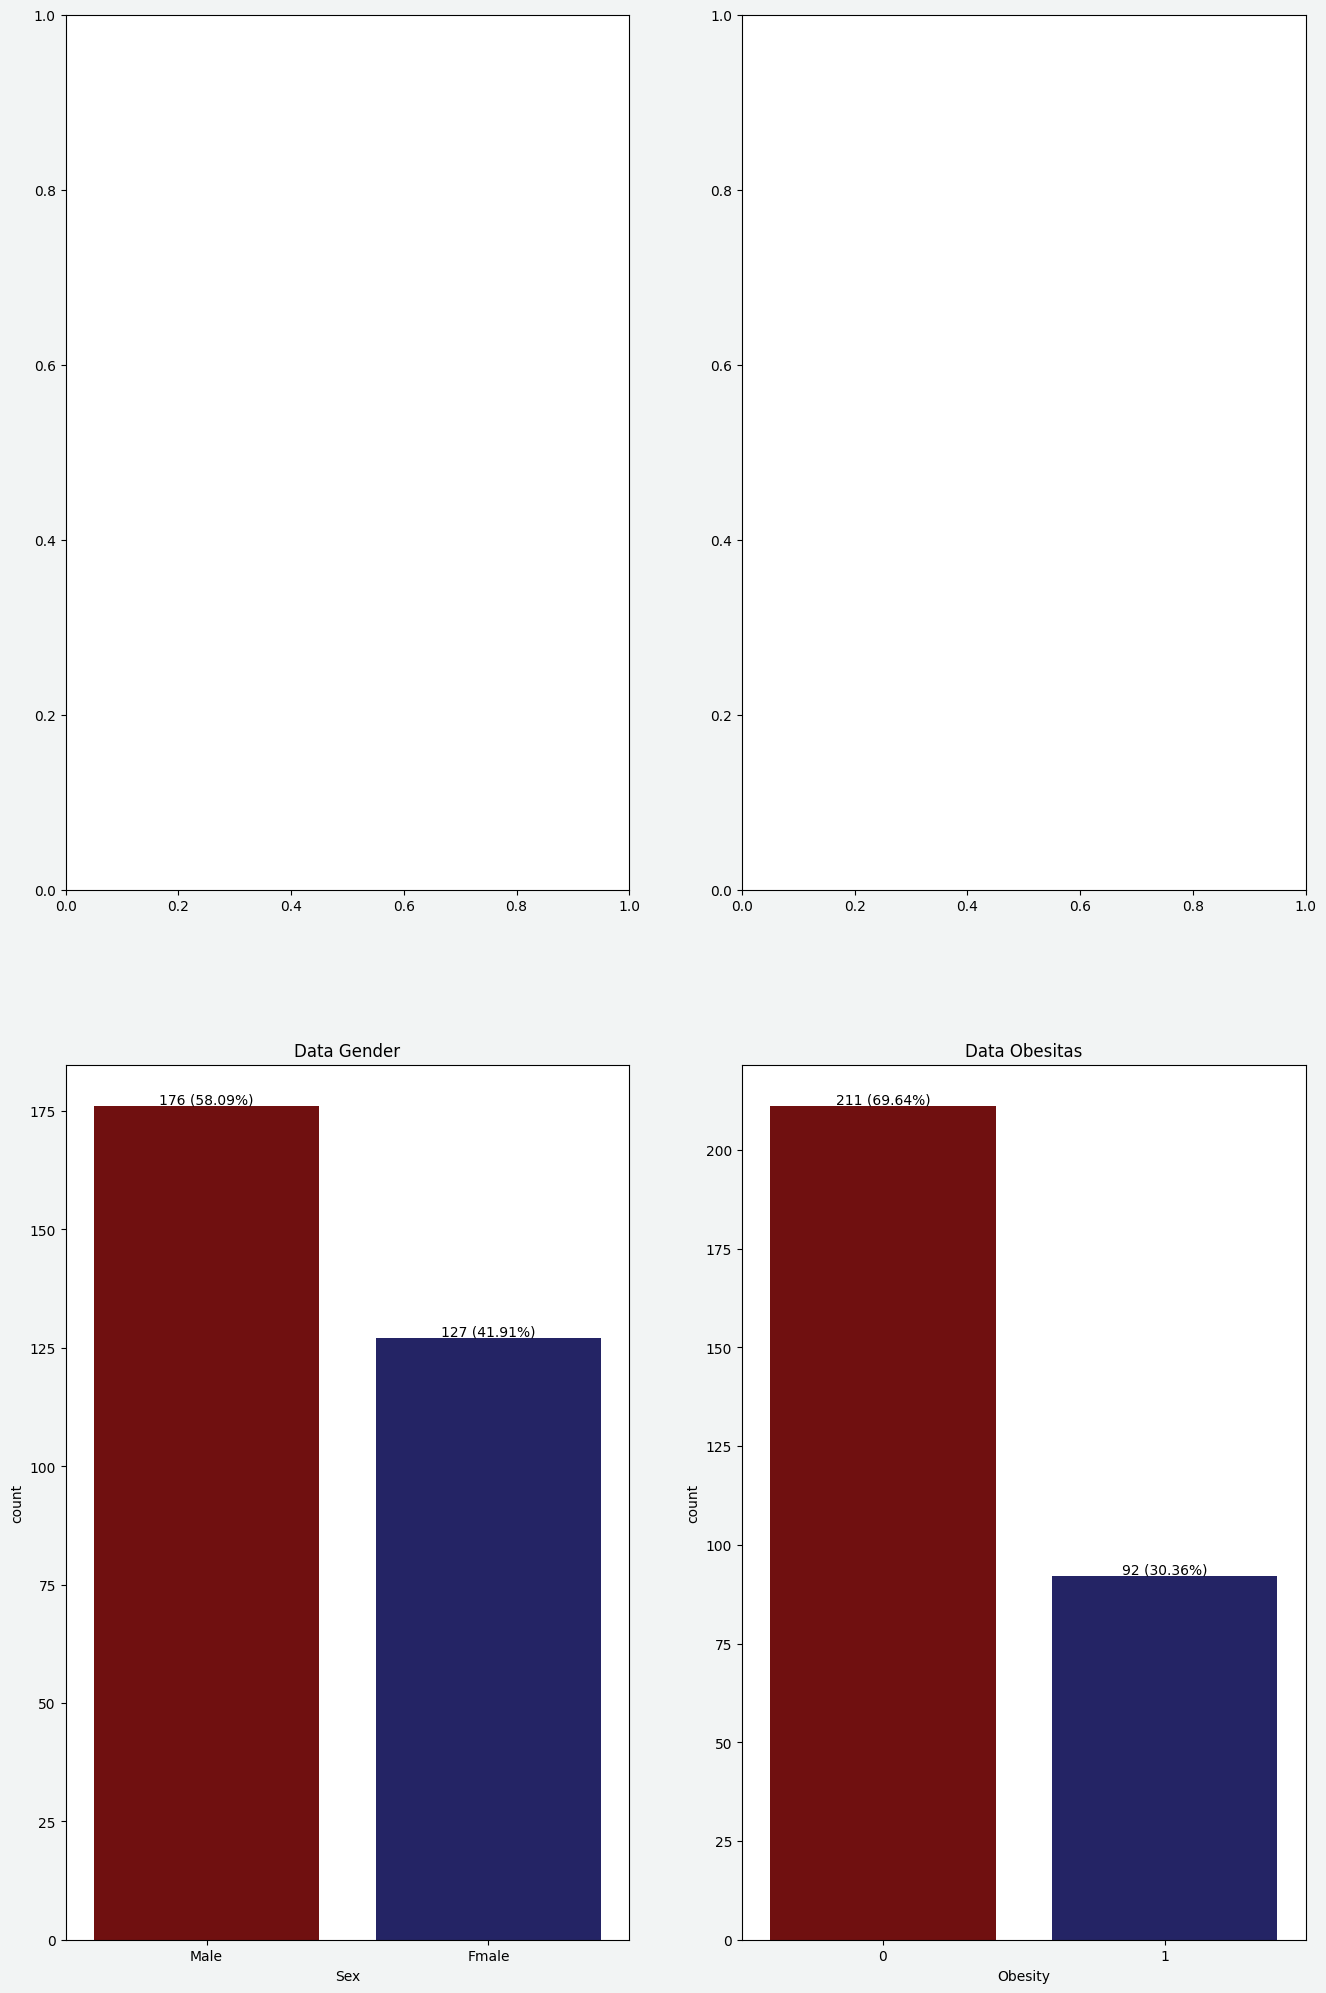

In [7]:
# for categorical data
fig, axes = plt.subplots(2,2,figsize=(16,25), facecolor='#F2F4F4')

# countplot for 'Gender'
abs_gender = ecomm["Sex"].value_counts(ascending=False)
sns.countplot(x=ecomm["Sex"], order=abs_gender.index,ax=axes[1,0],palette=['#800000','#191970'])
axes[1,0].set_title("Data Gender", fontsize=12)
rel_gender = ecomm["Sex"].value_counts(ascending=False, normalize=True).values*100
lbs_gender = [f"{g[0]} ({g[1]:.2f}%)" for g in zip(abs_gender, rel_gender)]
axes[1,0].bar_label(container=axes[1,0].containers[0], labels=lbs_gender)

# countplot for 'Gender'
abs_Obesity = ecomm["Obesity"].value_counts(ascending=False)
sns.countplot(x=ecomm["Obesity"], order=abs_Obesity.index,ax=axes[1,1],palette=['#800000','#191970'])
axes[1,1].set_title("Data Obesitas", fontsize=12)
rel_Obesity = ecomm["Obesity"].value_counts(ascending=False, normalize=True).values*100
lbs_Obesity = [f"{g[0]} ({g[1]:.2f}%)" for g in zip(abs_Obesity, rel_Obesity)]
axes[1,1].bar_label(container=axes[1,1].containers[0], labels=lbs_Obesity)

